In [1]:
# Question-5

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
data=load_breast_cancer()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
print("Classes:")
for idx,name in enumerate(data.target_names):
    print(f"{idx}:{name}")

Classes:
0:malignant
1:benign


In [4]:
X=df[['mean radius']]
y=df['target']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [6]:
model=LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)[:,1]

In [8]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,mean_squared_error,roc_curve,roc_auc_score,confusion_matrix

cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
re=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
auc=roc_auc_score(y_test,y_pred_proba)

print(f"Accuracy {acc:.3f}")
print(f"Precision {pre:.3f}")
print(f"Recall {re:.3f}")
print(f"F1-Score {f1:.3f}")
print(f"Mean Squared error {mse:.3f}")
print(f"Root Mean Squared Error {rmse:.3f}")
print(f"AUC Score {auc:.3f}")

Accuracy 0.860
Precision 0.881
Recall 0.897
F1-Score 0.889
Mean Squared error 0.140
Root Mean Squared Error 0.375
AUC Score 0.938


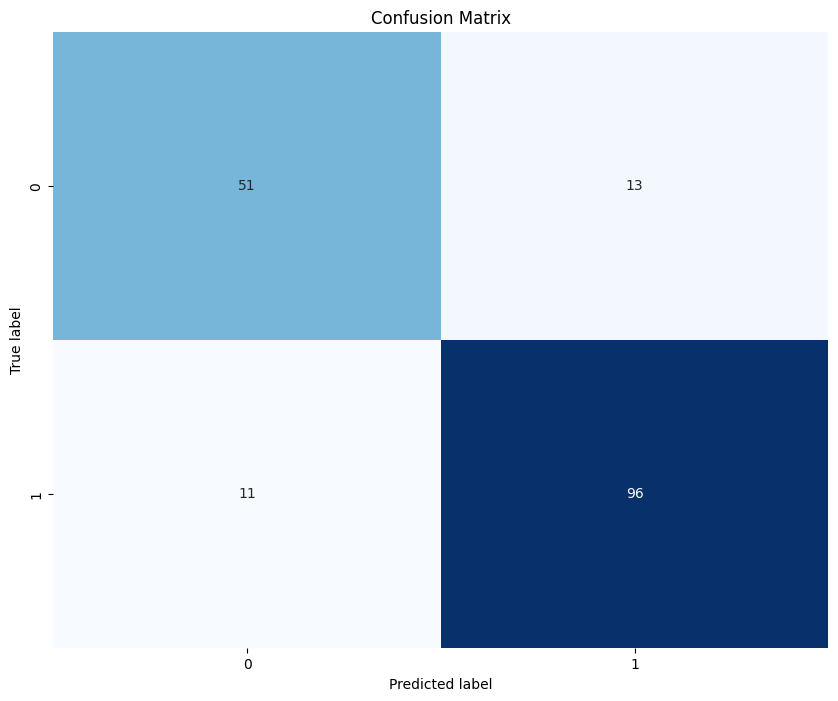

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

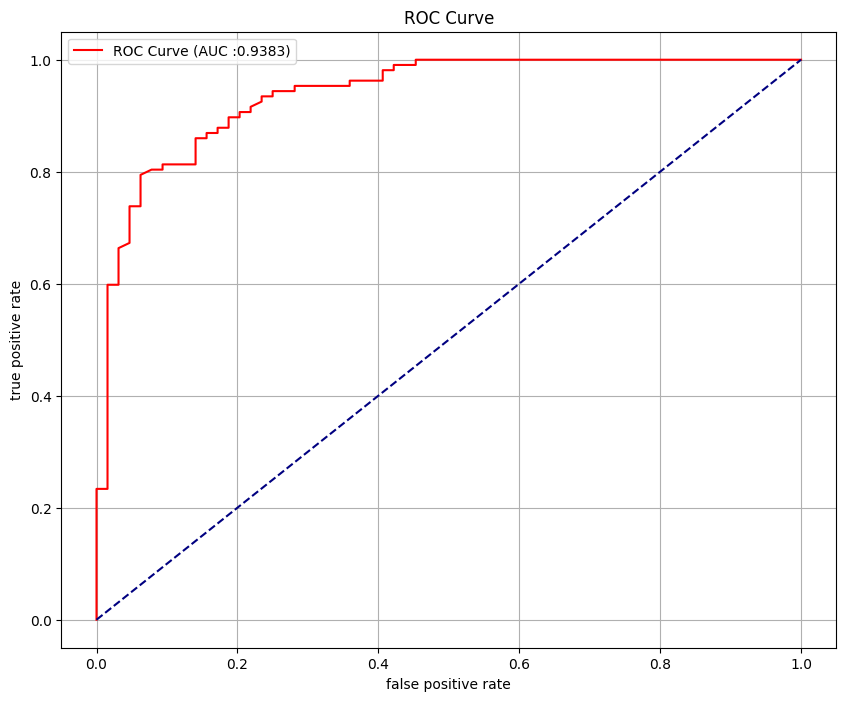

In [10]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='red',label=f"ROC Curve (AUC :{auc:.4f})")
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.title("ROC Curve")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()
plt.grid()
plt.show()